In [214]:
import numpy as np
import matplotlib.pyplot as plt

#atomic units scaling
q = -1 
m = 1

x0 = 0
x0_prime = 0

t = np.linspace(-1, 6, 100)

#defining the acceleration, velocity, and position. Obtained via integration from the newton's eqn of motion
def a(t, tb=1):
    return np.cos(t)

def v(t, tb):
    return (np.sin(t)- np.sin(tb))

def x(t, tb):
    return (-np.cos(t)+np.cos(tb)-np.sin(tb)*(t-tb))



In [215]:
#bisection root finding slightly customised to this problem
def bisection_method(tb, lower, upper, tol=1e-10, max_iter=100):
    if x(upper,tb) * x(lower,tb) > 0: # root existence condition
        raise ValueError("f(a) and f(b) must have opposite signs.")
    iterations = 0
    while abs(upper - lower) > tol and iterations < max_iter:
        mid = (upper + lower) / 2
        
        if x(mid,tb) == 0: # exact root found
            break
        elif x(lower,tb) * x(mid,tb) < 0:
            upper = mid
        else:
            lower = mid
        iterations += 1
    return mid

Birth Time(s)       Return Time(s)      Energy(atomic Units)
------------------------------------------------------------
-1.0                No return                               
-0.9                No return                               
-0.8                No return                               
-0.7                No return                               
-0.6                No return                               
-0.5                No return                               
-0.4                No return                               
-0.3                No return                               
-0.2                No return                               
-0.1                No return                               
-0.0                No return                               
0.1                 5.217707258008886   0.47517002580166395 
0.2                 4.782174621883314   0.715489447647753   
0.3                 4.440727656416129   0.792347438946695   
0.4                 4.14

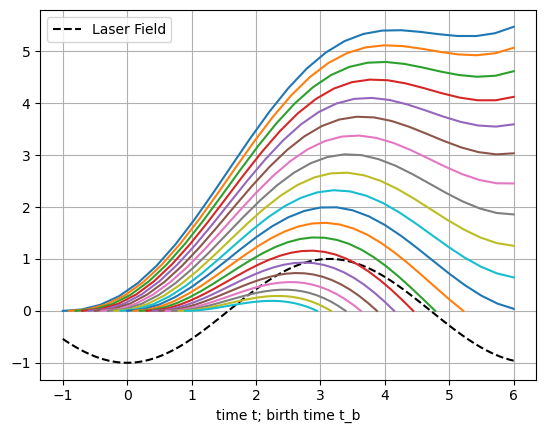

In [216]:
# part 1
tb_range = np.arange(-1, 1, 0.1)

plt.plot(t, -np.cos(t),"--k" ,label="Laser Field")
plt.legend()
plt.grid()
plt.xlabel("time t; birth time t_b")


# For use in later parts
T_birth = []
T_return = []
E_recoll = []


# Calculations for a single value of tb (EXTENDED TO ARRAY HEREAFTER)
# tb= 0.5
# tr = bisection_method(tb, 2,6)
# t_range = np.linspace(tb, tr, 25)
# plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")

print(f"{'Birth Time(s)':<20}{'Return Time(s)':<20}{'Energy(atomic Units)':<20}")
print("-" * 60)


for tb in tb_range:
    try:
        tr = bisection_method(tb, 2, 6)
    except:
        # print(f"For tb={tb}, electron does not return ")
        tr = "No return"
        energy = ""
        t_range = np.linspace(tb, 6, 25)
    else:
        # print(tb, tr)
        tr = bisection_method(tb, 2,6)
        T_return.append(tr)
        T_birth.append(tb)
        
        t_range = np.linspace(tb, tr, 25)
        
        energy = 0.5*v(tr,tb)**2
        E_recoll.append(energy)
    plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")
    print(f"{round(tb,2):<20}{tr:<20}{energy:<20}")
    
    
    # t_range = np.linspace(tb, 6, 25)
    # plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")
    

    
    


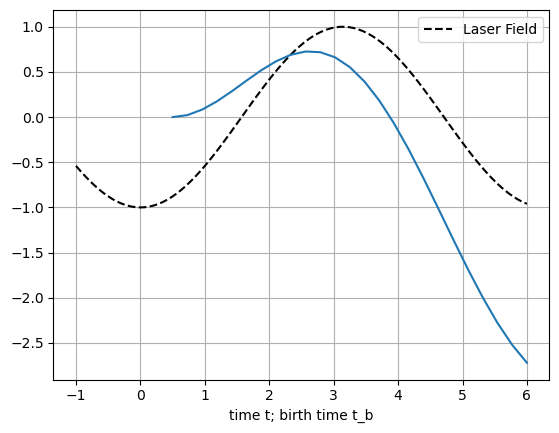

In [217]:
tb_range = np.arange(-1, 1, 0.1)

plt.plot(t, -np.cos(t),"--k" ,label="Laser Field")
plt.legend()
plt.grid()
plt.xlabel("time t; birth time t_b")


# Tbirth, Treturn, E_recoll : data from when the return actually takes place
# recreating the same graph as above, only with actual collision trajectories

tb= 0.5
t_range = np.linspace(tb, 6, 25)
plt.plot(t_range, x(t_range, tb))

# CONTINUED DOWN BELOW, INCLUDE AFTER CONCRETE LOGIC LATER




Parts after this consider of the demo/random trials to test algorithm and logic. 
They are NOT a part of the actual source code, and hence should not be considered by anyone other than the creator.

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


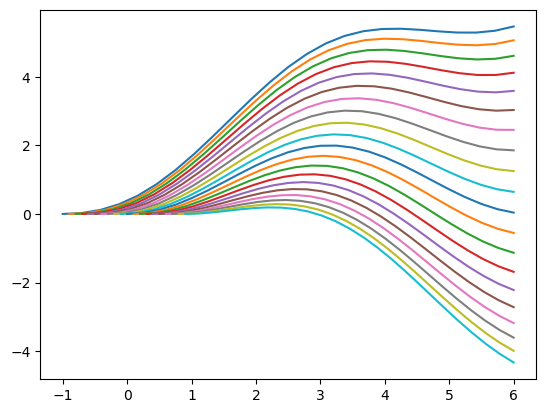

In [218]:
# demo run of trajectories

for tb in tb_range:
    t_range = np.linspace(tb, 6, 25)
    print(t_range.dtype)
    plt.plot(t_range, x(t_range, tb), label=f"position for tb={tb}")
    

TypeError: 'numpy.float64' object is not callable

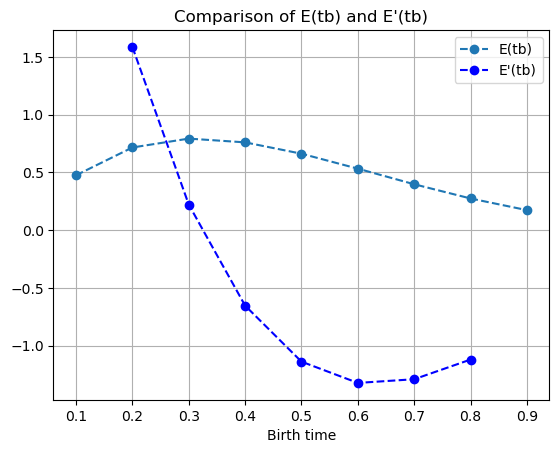

In [220]:
# T_return, Tbirth
# E_recoll, from the above recollision data

plt.plot(T_birth, E_recoll, "--o", label="E(tb)")

T_birth, E_recoll

# Central difference method for derivative
def central_difference_data(x, y):
    derivatives = []
    h = x[1] - x[0]  # Assuming uniform spacing
    
    for i in range(1, len(x) - 1):
        derivative = (y[i+1] - y[i-1]) / (2 * h)
        derivatives.append(derivative)
    
    return derivatives

E_recoll_prime = central_difference_data(T_birth, E_recoll);
plt.plot(T_birth[1:-1], E_recoll_prime, "--ob", label="E'(tb)")
plt.legend()
plt.grid()
plt.title("Comparison of E(tb) and E'(tb)")
plt.xlabel("Birth time")
# plt.show()

# Finding the exact point where E'(tb) = 0 for Maxima
def E_prime_analytical(tb): # 0.5*v*v
    tr = bisection_method(tb, 2, 6) # return time is between (2,6)
    return 0.5*v(tr, tb)**2

for x in T_birth[1:-1]:
    plt.plot(x, E_prime_analytical(x), "ok")

tb_range = np.linspace(0.0, 1.0, 100) # since E'(tb) has root between this as show by this graph below

